In [2]:
# Justin McClain
# Mesa starter level simulated agent based economy tutorial
# https://mesa.readthedocs.io/en/latest/tutorials/intro_tutorial.html

In [1]:
# Import dependencies (Mesa, Matplotlib, jupyter installed locally)

import mesa

# Data visualization tools.
import seaborn as sns

# Has multi-dimensional arrays and matrices. Has a large collection of
# mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

In [11]:
import copy

class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""
    
    def __init__(self, unique_id, model, wealthProportion):
        
        # initialize wealth proportion variable from param
        self.wealthProportion = wealthProportion

        # Create the agent's variable and set the initial values.
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        print(f"Hi, I am agent {str(self.unique_id)}, I have {str(self.wealth)} wealth.")
        # Verify agent has some wealth
        if self.wealth > self.wealthProportion:
            other_agent = self.random.choice(self.model.schedule.agents)
            if other_agent is not None and other_agent.wealth <= self.wealth:
                other_agent.wealth += (self.wealthProportion * self.wealth)
                self.wealth -= (self.wealthProportion * self.wealth)
                

In [12]:
class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, N, wealthProportion):
        self.num_agents = N
        # Create scheduler and assign it to the model
        self.schedule = mesa.time.RandomActivation(self)

        # Create wealth proportion variable for use in MoneyAgent
        self.wealthProportion = wealthProportion

        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self, self.wealthProportion)
            # Add the agent to the scheduler
            self.schedule.add(a)

    def step(self):
        """Advance the model by one step."""

        # The model's step will go here for now this will call the step method of each agent and print the agent's unique_id
        self.schedule.step()
        

In [13]:
# import matplot for graph
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt


Hi, I am agent 4, I have 1 wealth.
Hi, I am agent 2, I have 1 wealth.
Hi, I am agent 8, I have 1 wealth.
Hi, I am agent 7, I have 1 wealth.
Hi, I am agent 0, I have 1.1 wealth.
Hi, I am agent 1, I have 1 wealth.
Hi, I am agent 6, I have 1 wealth.
Hi, I am agent 5, I have 1.1 wealth.
Hi, I am agent 3, I have 1 wealth.
Hi, I am agent 9, I have 1 wealth.

Hi, I am agent 6, I have 1.0 wealth.
Hi, I am agent 7, I have 1.2100000000000002 wealth.
Hi, I am agent 5, I have 1.09 wealth.
Hi, I am agent 0, I have 1.1110000000000002 wealth.
Hi, I am agent 1, I have 0.9 wealth.
Hi, I am agent 4, I have 1.09 wealth.
Hi, I am agent 2, I have 1.01 wealth.
Hi, I am agent 3, I have 0.9 wealth.
Hi, I am agent 8, I have 1.0111 wealth.
Hi, I am agent 9, I have 0.9 wealth.

Hi, I am agent 5, I have 0.9810000000000001 wealth.
Hi, I am agent 1, I have 0.99 wealth.
Hi, I am agent 2, I have 0.909 wealth.
Hi, I am agent 8, I have 1.0009890000000001 wealth.
Hi, I am agent 3, I have 0.9 wealth.
Hi, I am agent 9, I

C:\Users\mcjst\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mcjst\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


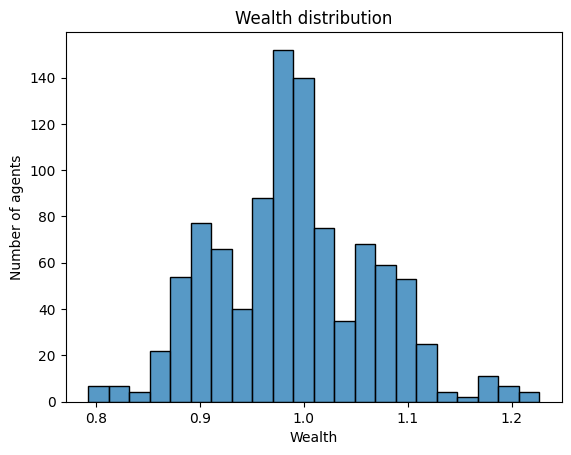

In [16]:
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for j in range(100):
    # Run the model with a wealth distribution proportion of
    model = MoneyModel(10, 0.10)
    for i in range(10):
        print("")
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=False)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="Number of agents");